34. LaTeX Markdown and Generating Data
with Numpy
15min

### Notebook Imports and Packages
## Notebook Imports and Packages
# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error


%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Make Data 
x_1 = np.linspace(start = -3, stop = 3, num = 100)
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

In [4]:
# Make Data 
x_1 = np.linspace(start = -3, stop = 3, num = 10)
x_1

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

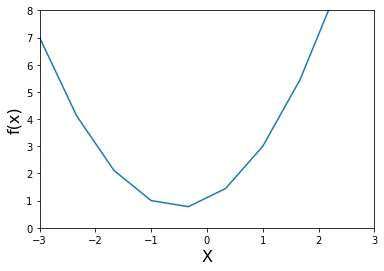

In [5]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1))
plt.show()

35. Understanding the Power Rule & Creating Charts with Subplots 15min

# slope and Derivatives 
challenge: Create a python function for the derivative of f(x) called df(x)

In [6]:
def df(x):
    return 2*x + 1

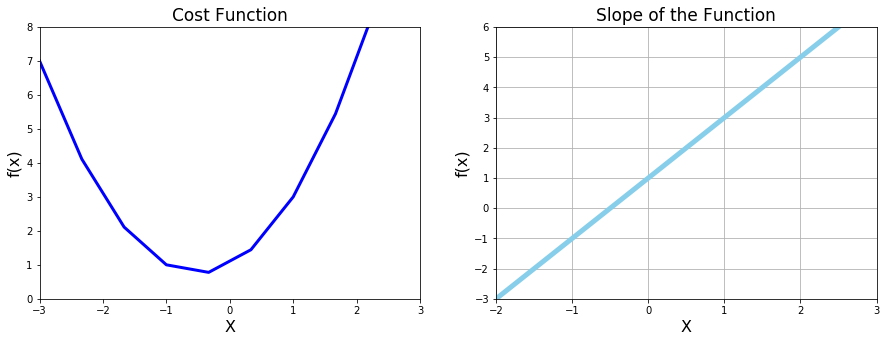

In [7]:
# Plot function and derivative side by side

plt.figure(figsize = [15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)


#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5)


plt.show()

36. [Python] - Loops and the Gradient Descent Algorithm 37min

## Python Loops and Gradient Descent

In [8]:
# Python For Loop

for n in range(5):
    print('Hello World', n)
print('End of Loop')

Hello World 0
Hello World 1
Hello World 2
Hello World 3
Hello World 4
End of Loop


In [9]:
# Python while loop

counter = 0
while counter < 7:
    print('Counting ...', counter)
    counter = counter + 1
print('Ready or not, here I Come!')

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I Come!


In [10]:
# Gradient Descent 
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient

    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    
    if step_size < precision:
        print('Loop ran this many times: ', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost at this point is: ', f(new_x))

Loop ran this many times:  61
Local minimum occurs at: -0.4999965672099885
Slope or df(x) value at this point is:  6.8655800230521535e-06
f(x) value or cost at this point is:  0.750000000011784


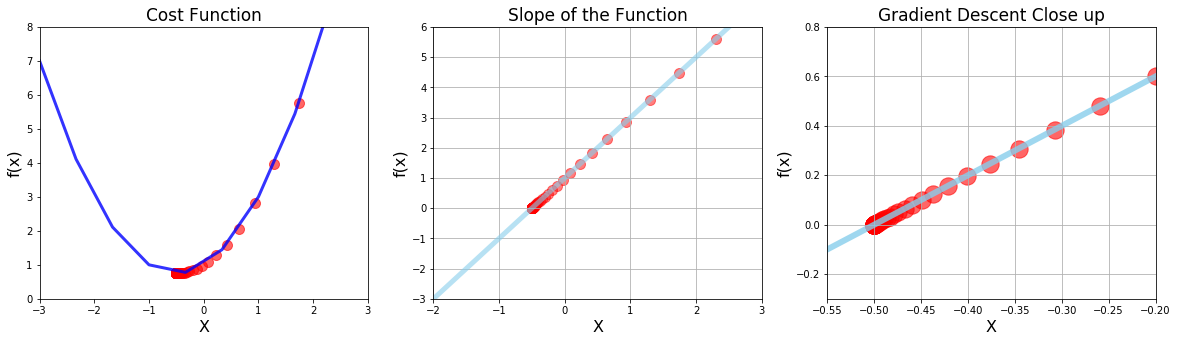

In [11]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize = [20, 5])

#1 Chart: Cost Function
plt.subplot(1, 3, 1) # rows, columns, index

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)


#2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

#2 Chart: Derivative (close up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent Close up', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)

plt.grid()

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

In [12]:
#37. [Python] - Advanced Functions and the Pitfalls of Optimisation (Part 1) 38min

# Example 2 - Multiple Minima vs Initial Guess and Advanced Functions

## $$ g(x) = x^4 - 4x^2 + 5 $$

In [13]:
#Make some data
x_2 = np.linspace(-2, 2, 1000)

#Challenge: Write the g(x) function and the dg(x) function in Python?

In [14]:
def g(x):
    return x**4 - 4*x**2 + 5

In [15]:
def dg(x):
    return 4*x**3 - 8*x

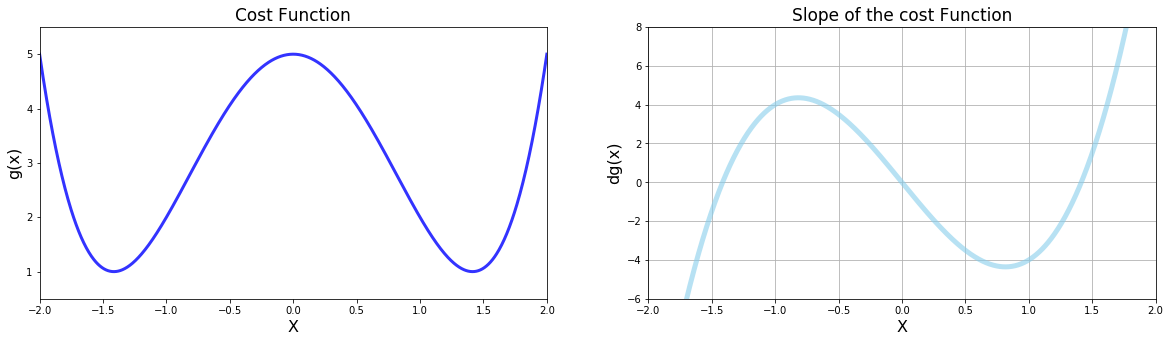

In [16]:
# Plot function and derivative side by side

plt.figure(figsize = [20, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha=0.8)

#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5, alpha=0.6)


plt.show()

## Gradient Descent as a Python Function

In [17]:
def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, 
                    max_iter = 300):
    #ctrl + ]
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))


        if step_size < precision:
            break
    return new_x, x_list, slope_list #packing all these values into a single tuple

In [18]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [19]:
#unpacking the tuples and storing the results in three diifferent variables 
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.5, 
                                                 multiplier = 0.01, precision = 0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [20]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


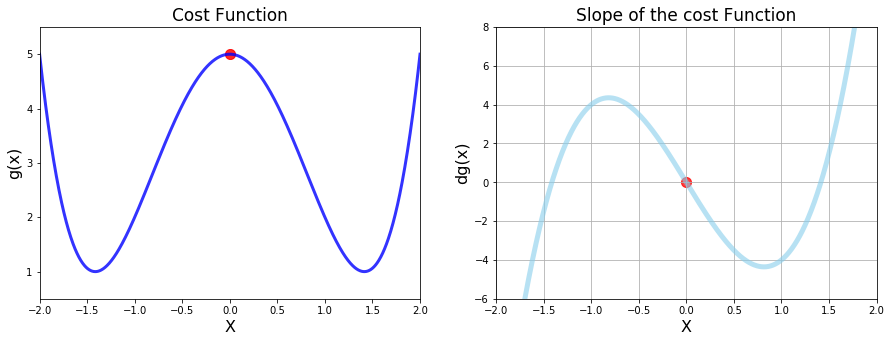

In [21]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

In [22]:
#38. [Python] - Tuples and the Pitfalls of Optimisation (Part 2) 30min

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [23]:
#Make data

x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3 

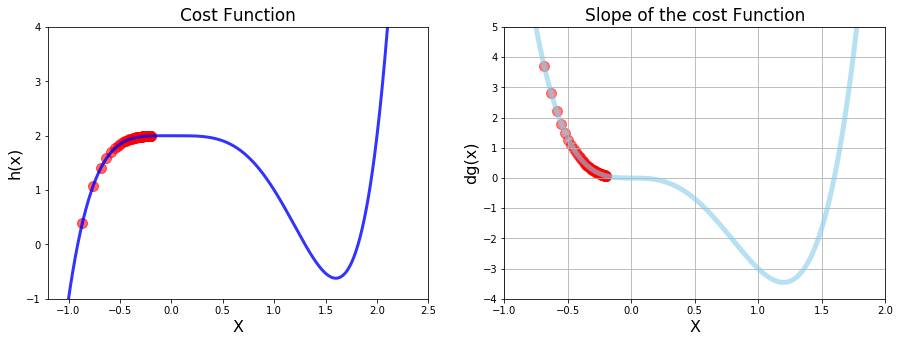

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [24]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2,
                                                max_iter = 71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('h(x)', fontsize = 16)

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.grid()

plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [25]:
import sys
#help(sys)
#sys.version
#type(h(local_min))

sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [26]:
#Creating a tuple - tuple packing
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

#How to access a value in a tuple
print('I looooove ', breakfast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

#TypeError: 'tuple' object does not support item assignment

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

#tuple unpacking

main, side, greens = breakfast
print('Main course is ', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at tthe last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I looooove  bacon
My hotel has no 4th floor
(42,)
Main course is  bacon
Local min is 1.5989534547394717
Cost at tthe last x value is -0.6214287992331258
Number of steps is 117


In [27]:
#39. Understanding the Learning Rate 30min

# The Learning Rate

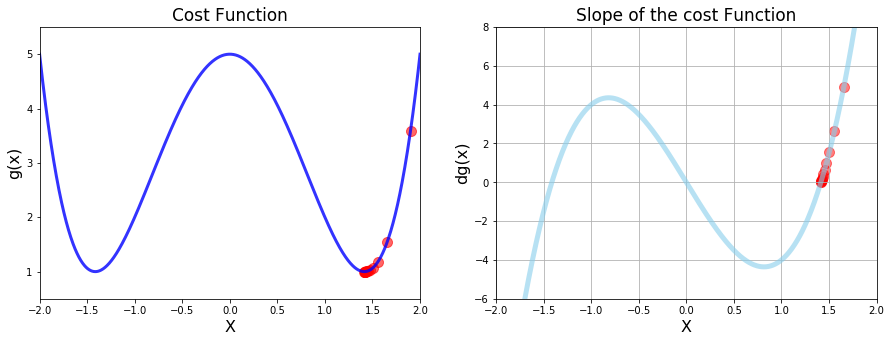

Number of steps is:  14


In [28]:
#Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9,
                                                multiplier = 0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [15, 5])

#1 Chart: Cost Function
plt.subplot(1, 2, 1) # rows, columns, index

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost Function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('dg(x)', fontsize = 16)

plt.grid()

plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)


plt.show()

print('Number of steps is: ', len(list_x))

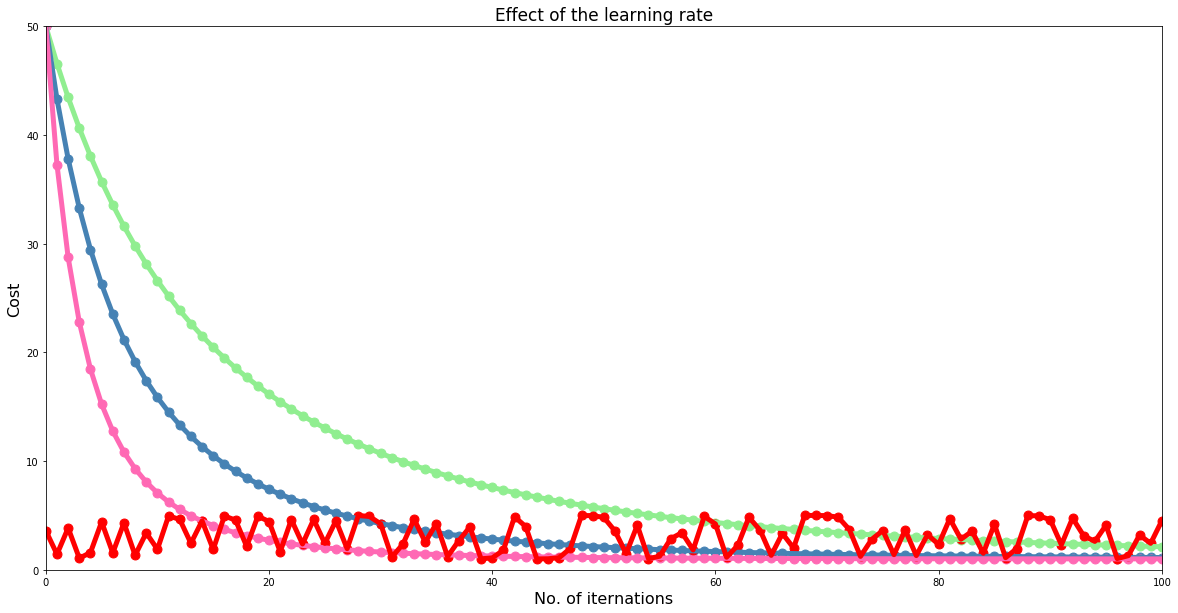

In [29]:
#Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3,
                                                multiplier = 0.0005, precision = 0.0001, max_iter= n)

#Challenge: plot two more learning rates: mid_gamma (0.001) and high_gamma(0.002)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3,
                                                multiplier = 0.001, precision = 0.0001, max_iter= n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3,
                                                multiplier = 0.002, precision = 0.0001, max_iter= n)
#Experiment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9,
                                                multiplier = 0.25, precision = 0.0001, max_iter= n)

# Plotting reduction in cost for each iteration
plt.figure(figsize = [20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize = 17)
plt.xlabel('No. of iternations', fontsize = 16)
plt.ylabel('Cost', fontsize = 16)

#Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays

low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])

# 2) X Axis Data: Create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth = 5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate

plt.plot(iteration_list, g(mid_values), color = 'steelblue', linewidth = 5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting high learning rate

plt.plot(iteration_list, g(high_values), color = 'hotpink', linewidth = 5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Plotting insane learning rate

plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'red', linewidth = 5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)

plt.show()


In [30]:
#40. How to Create 3-Dimensional Charts 25min

# Example 4 - Data Viz with 3D Charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$ 

In [31]:
def f(x,y): 
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [32]:
# Make our x and y data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


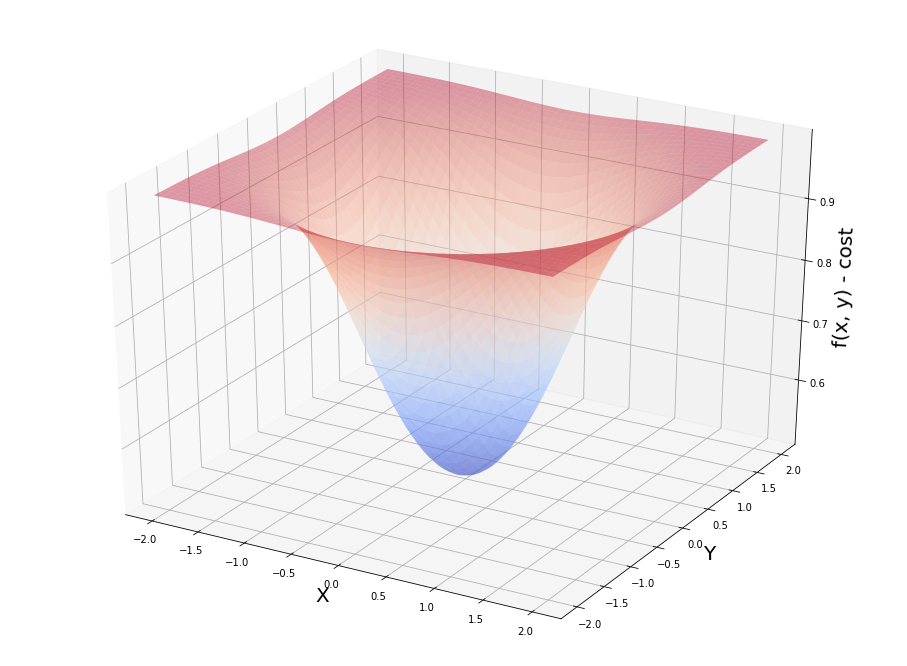

In [33]:
# Generating 3D Plot 
fig = plt.figure(figsize = [16, 12]) #figure is a top level container for other bits of the chart 
ax = fig.gca(projection = '3d') #pre-requisite: from mpl_toolkits.mplot3d.axes3d import Axes3D

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - cost', fontsize = 20)


ax.plot_surface(x_4,y_4,f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)

plt.show()

In [34]:
#41. Understanding Partial Derivatives and How to use SymPy 18min

## Partial Derivatives and Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac {2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac {2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right)^2}$$

In [35]:
a, b = symbols('x, y')

print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative with respect to x is: ', diff(f(a,b), a))
print('Value of f(x,y) at x=1.8, y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) #Python dictionary
diff(f(a,b), a).evalf(subs={a:1.8, b:1.0})

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative with respect to x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8, y=1.0 is:  0.990604794032582


0.0368089716197505

## Batch Gradient Descent with Sympy

In [36]:
#42. Implementing Batch Gradient Descent with SymPy 12min
# Setup

multiplier = 0.1 
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = diff(f(a,b), a).evalf(subs = {a:params[0], b:params[1]}) #more resource intensive
    gradient_y = diff(f(a,b), b).evalf(subs = {a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
    
#Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1])) 

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [37]:
#43. [Python] - Loops and Performance Considerations 16min

In [38]:
#Partial Derivative functions example 4

def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r+1)**2


def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r+1)**2

In [39]:
# Setup

multiplier = 0.1 
max_iter = 500
params = np.array([1.8, 1.0]) #initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
    
#Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1])) 

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [40]:
#44. Reshaping and Slicing N-Dimensional Arrays 19min

## Graphing 3D Gradient Descent and Adv Numpy Arrays

In [41]:
# Setup

multiplier = 0.1 
max_iter = 100
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
    
#Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1])) 

(1, 2)
Values in gradient array [0.13086082 0.07270045]
Minimum occurs at x value of:  0.22554260634177148
Minimum occurs at y value of:  0.12530144796765078
The cost is:  0.518275488025232


In [42]:
# Advanced Numpy Array Practice: 
kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0] :', hs_band[0])
print('hs_band[0][1] :', hs_band[0][1])

#Challenge
print(hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0) #axis = 0 means adding a row, axis = 1 means adding a column
print(the_roots)

#the_roots = np.append(arr=hs_band, values=kirk.reshape(2,1), axis=1) 
#print(the_roots)

print('Printing nicknames...', the_roots[:,0]) 

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis = 0)
print(the_roots)

#Challenge
print('Printing band roles ...', the_roots[:,1])

(1, 2)
(2, 2)
hs_band[0] : ['Black Thought' 'MC']
hs_band[0][1] : MC
Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']
 ['Malik B' 'MC']]
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


In [43]:
#45. Concatenating Numpy Arrays 8min

In [44]:
# Setup

multiplier = 0.1 
max_iter = 200
params = np.array([1.8, 1.0]) #initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients 
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)),axis=0) #the same result as the line above
    
#Results 
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1])) 

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


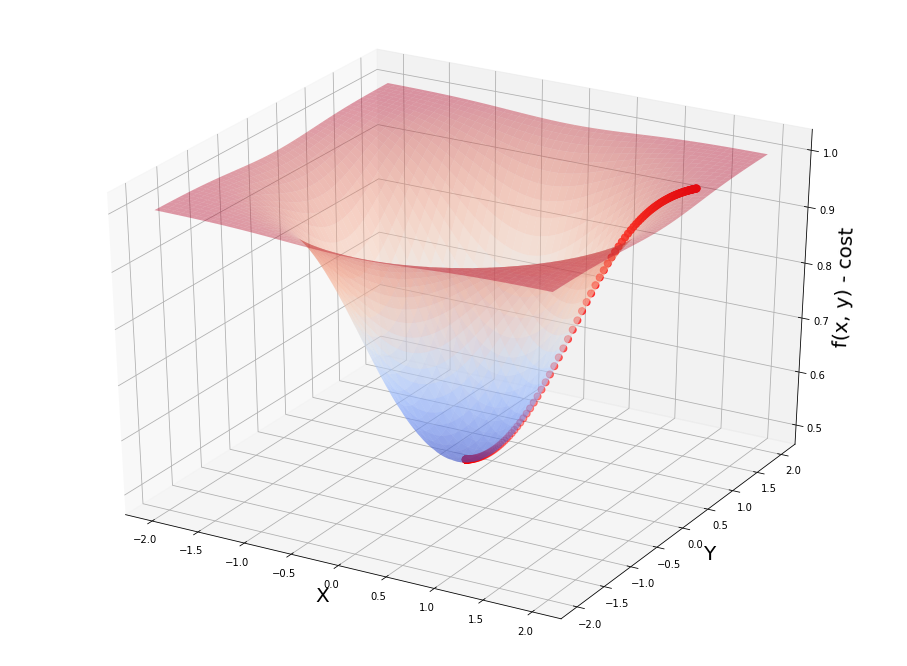

In [45]:
# Generating 3D Plot 
fig = plt.figure(figsize = [16, 12]) #figure is a top level container for other bits of the chart 
ax = fig.gca(projection = '3d') #pre-requisite: from mpl_toolkits.mplot3d.axes3d import Axes3D

ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - cost', fontsize = 20)


ax.plot_surface(x_4,y_4,f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [46]:
#46. Introduction to the Mean Squared Error (MSE) 11min

# Example 5 - Working with Data & a Real Cost Function 
## Mean Squared Error: a cost function for regression problems
### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$
### $$MSE = \frac{1}{n}\sum_{i=1}^{n} \big( y - \hat{y}\big)^2$$

In [47]:
#47. Transposing and Reshaping Arrays 13min

In [64]:
#Make sameple data 
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)
x_5

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


array([[0.1],
       [1.2],
       [2.4],
       [3.2],
       [4.1],
       [5.7],
       [6.5]])

In [67]:
#quick linear regression

regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

regr.coef_

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


array([[1.22272646]])

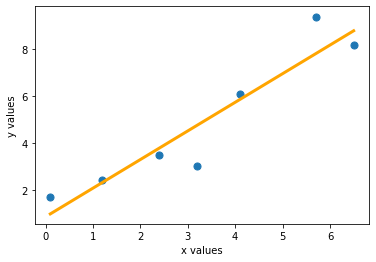

In [50]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth = 3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [51]:
#48. Implementing a MSE Cost Function 12min

In [52]:
#y_hat = theta0 + theta1*x
y_hat = 0.8475351486029536 + 1.2227264637835915*x_5
print('Est values y_hat are:\n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [53]:
#Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
#function and print out the MSE for the y_hat calculated above. 

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y-y_hat)**2)
    #mse_calc = (1/y.size) * sum((y-y_hat)**2)
    mse_calc = np.average((y-y_hat)**2, axis=0)
    return mse_calc

In [54]:
print('Manually calculated MSE is: ', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))

Manually calculated MSE is:  [0.94796558]
MSE regression using manual calc is 0.9479655759794577
MSE regression is 0.9479655759794577


In [55]:
#49. Understanding Nested Loops and Plotting the MSE Function (Part 1) 12min

## 3D plot for the MSE Cost Function 
### Make data for thetas

In [70]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [71]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
#50. Plotting the Mean Squared Error (MSE) on a Surface (Part 2) 16min

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [58]:
#Nested loop practice 

for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


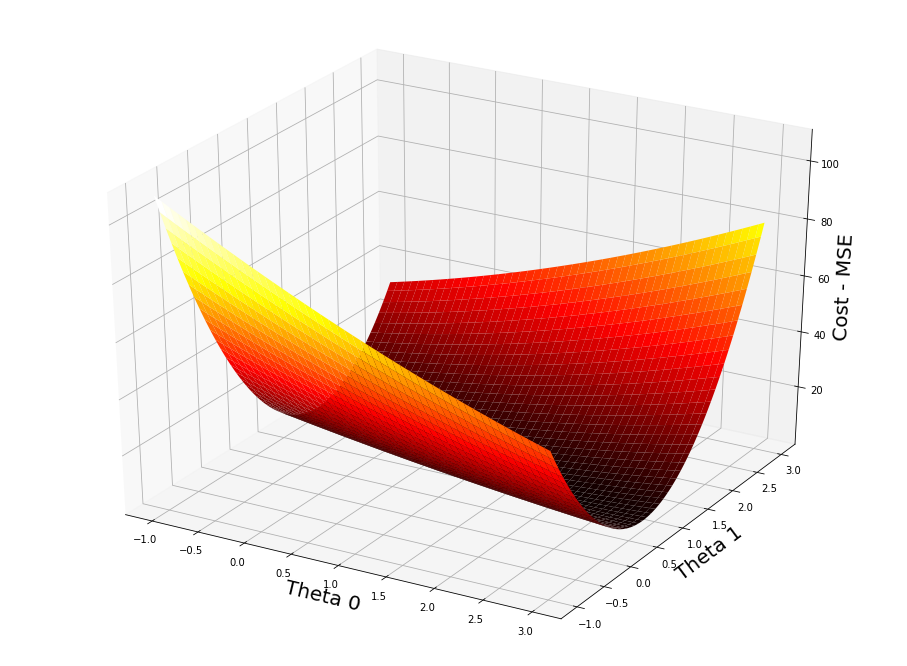

In [73]:
#Plotting MSE

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [78]:
print('min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices = plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723
